# Graph Search

A graph is a mathematical way to represent the road network. Graph consists of 3 sets: vertices/nodes, edges and a set representing relations between vertices and edges The graph nodes represent intersections, and the edges represent the roads. A route is a sequence of edges connecting the origin node to the destination node. Search is the systematic examination of states to find a path from the start state to the goal state. Mathematically speaking, a graph can be represented by $G$ where $G=(V,E)$. For the graph $G$, $V$ represents a set of vertices and $E$ represents a set of edges. Each edge is a tuple $(v,w)$ where $w$, $v \in V$. Weight can be added as a third component to the edge tuple.

Search algorithms can be broadly classified into deterministic algorithms and stochastic algorithms. In the former, the search algorithm follows a rigorous procedure and its path and values of both design variables and the functions are repeatable. For the same starting point, the algorithm will follow the same path whether you run the program today or tomorrow. In the latter, the algorithm always has some randomness and the solution is not exactly repeatable. Based on the availability of information about the search space (e.g., the distance from the current state to the goal), deterministic search algorithms can be broadly classified into blink/uninformed and informed search.

<img src="images/GraphSearch.png" alt="Search Algorithms" style="float: left; margin-right: 10px;" />


# Breadth-first Search (BFS)

Graph traversal refers to a process that traverses vertices of a graph following certain order (starting from user-input sources). BFS is a traversing algorithm where you should start traversing from a selected node (source or starting node) and traverse the graph layerwise thus exploring the neighbour nodes (nodes which are directly connected to source node). You must then move towards the next-level neighbour nodes. 


__BREADTH-FIRST-SEARCH__ ( _source_ , _destination_ ) __return__ a route   
&emsp;_frontier_ &larr; a **FIFO** initialized with _source_ node  
&emsp;_explored_ &larr; _empty_    
&emsp;_found_ &larr; _False_  
&emsp;__while__  _frontier_ __is not__ _empty_ __and__ _found_ __is__ _False_ __do__  
&emsp;&emsp;&emsp;_node_ &larr; _frontier_.pop()   
&emsp;&emsp;&emsp;__add__ _node_ __to__ _explored_    
&emsp;&emsp;&emsp;__for__ _child_ __in__ _node_.expand() __do__   
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _child_ __is not in__ _explored_ __and__ _child_ __is not in__ _frontier_   __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__add__ _child_ __to__ _frontier_    
&emsp;__return__  _route_

We will be trying to find and visualize the path between Equestrian Statue of Edward VII and Bahen Center of Technology around Toronto University campus using breadth first search

In [1]:
import osmnx as ox
import time, math
from collections import deque
from itertools import islice
from tqdm import tqdm
from utilities import *

Here OSMnx find the largest connected component centered around the ```location point``` with specified ```dist``` on each side (w/n/e/s).

In [2]:
location_point = (43.661667, -79.395)
G = ox.graph_from_point(location_point, dist=300, clean_periphery=True, simplify=True)

Here you need to specify which node from our graph is the source (Equestrian Statue of Edward VII) and which is the destination node (Bahen Center of Technology). You can do so by acquiring the decimal coordinates of the desired node and use [```osmnx.distance.get_nearest_node```](https://osmnx.readthedocs.io/en/stable/osmnx.html#osmnx.distance.get_nearest_node) method

Using the aforementioned method and found that the osmid of the nodes for destination and source are 389677909, 55808290 respectively

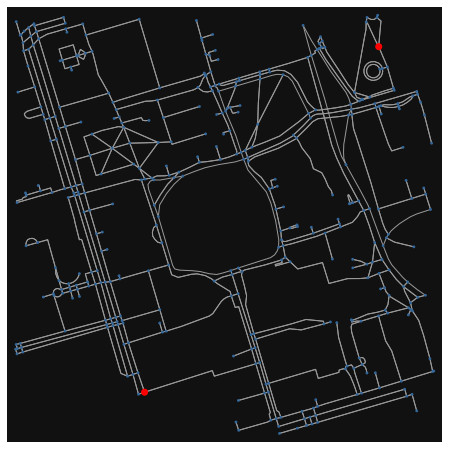

In [3]:
highlighted = [389677909, 55808290]

# marking both the source and destination node

nc = ['r' if node in highlighted else '#336699' for node in G.nodes()]
ns = [50 if node in highlighted else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2)

In [4]:
draw_map(G, highlight = highlighted)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

Each node in our graph is represented as a dictionary with many attributes of no interest to us now, so manipulating them would obfuscate the algorithm jumping through hoops to get only one attribute from the dictionary. <b>so</b> we define class ```Node``` which only retains the data we need to be able to do searching and traversing, like the parent of the node (the one that produced it from its expansion) and the length of the edge between the parent and the node itself.

Please check its source code in ```./utilities/src/common.py``` to know how it captures the data from the graph. 

In [5]:
source(Node)

In [6]:
# The Algorithm
# first define the origin/source nodes as Node
origin = Node(graph = G, osmid = 55808290)
destination = Node(graph = G, osmid = 389677909)

In [7]:
%%time
bar = tqdm(total=len(G))

# this is where we would save our result at the end
route = []

# we will be using deque instead of normal python lists
# to have O(1) [pop/append]-ing instead of O(n) in lists
# because deques are implemented with linked-list and
# lists are implemented with arrays 

frontier = deque([origin])

# this is a directed multigraph so we need to have memory
# so we don't get stuck in a loop
explored = set()

found = False

while frontier and not found:
    bar.update(1); time.sleep(0.05) # for the progress bar -- ignore

    node = frontier.popleft()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
            frontier.append(child)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

 59%|███████████████████████▍                | 227/387 [00:14<00:10, 15.74it/s]

The route is 

 [55808290, 304891685, 55808284, 1721866234, 389678268, 4953810915, 389678267, 24960090, 24960068, 1258698109, 389678145, 24960070, 24960073, 24960076, 24960080, 6028561924, 5098988924, 389678131, 2557539841, 389678133, 389677909] 

its cost is

 954.7269999999999
Wall time: 14.4 s


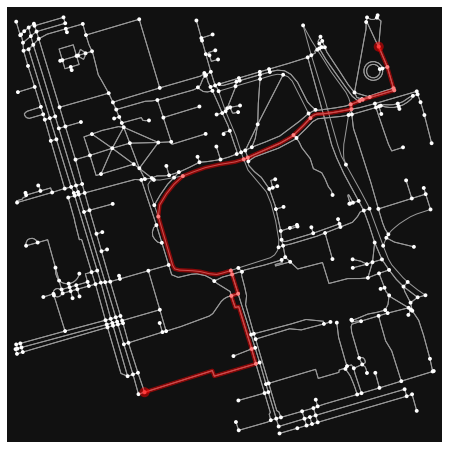

In [8]:
fig, ax = ox.plot_graph_route(G, route)

In [9]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

We will be using uber's [kepler.gl](https://kepler.gl/) for one time in this notebook only to make you aware of it, but unfortunatley we won't be using it because of its of its limited API.

# Depth-first Search (DFS)

The DFS algorithm is a recursive algorithm that uses the idea of backtracking. It involves exhaustive searches of all the nodes by going ahead, if possible, else by backtracking.

__DEPTH-FIRST-SEARCH__ ( _source_ , _destination_ ) __return__ a route   
&emsp;_frontier_ &larr; a **LIFO** initialized with _source_ node  
&emsp;_explored_ &larr; _empty_    
&emsp;_found_ &larr; _False_  
&emsp;__while__  _frontier_ __is not__ _empty_ __and__ _found_ __is__ _False_ __do__  
&emsp;&emsp;&emsp;_node_ &larr; _frontier_.pop()   
&emsp;&emsp;&emsp;__add__ _node_ __to__ _explored_    
&emsp;&emsp;&emsp;__for__ _child_ __in__ _node_.expand() __do__   
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _child_ __is not in__ _explored_ __and__ _child_ __is not in__ _frontier_   __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__add__ _child_ __to__ _frontier_    
&emsp;__return__  _route_

In [10]:
# The Algorithm
bar = tqdm(total=len(G))

route = []
frontier = deque([origin])
explored = set()
found = False
while frontier and not found:
    bar.update(1); time.sleep(0.05)
    node = frontier.pop()
    explored.add(node)
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route  = child.path()
                found = True
                continue
            frontier.append(child)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

 14%|█████▌                                   | 53/387 [00:03<00:21, 15.78it/s]

The route is 

 [55808290, 55808177, 55808169, 55808239, 389678268, 4953810915, 4953810914, 55808233, 299625330, 24959523, 50885177, 389677947, 1840221695, 1840221686, 1840221676, 783622470, 389678138, 3707407638, 6028561924, 6028561921, 389678124, 6028562355, 2557542523, 389677907, 389678038, 389678039, 389678040, 2143436381, 389678041, 389678184, 389678183, 389678216, 7311057931, 749951161, 242413453, 749952029, 389677909] 

its cost is

 1521.5479999999995


In [11]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

# Dijkstra Search
Dijkstra's algorithm allows us to find the shortest path between any two vertices of a graph. The algorithm creates a tree of shortest paths from the starting vertex, the source, to all other points in the graph.  Dijkstra's algorithm , published in 1959 and named after its creator Dutch computer scientist Edsger Dijkstra, is the base of several other graph search algorithms commonly used to solve routing problems in the navigation apps.


<img src="images/Dijkstra.png" alt="Dijkstra Algorithms" style="float: left; margin-right: 10px;" />



// this is modified version from the standard Dijkstra because  
// graphs from generated from maps have self-loops and parallel edges  
// which breaks dijkstra because self-loop edge could get choosen in the  
// priority queue step and mess the order of relaxation of the nodes
// this may not very obvious at first but trace the algorithm and you would  
// see what we meant  

// when a node get removed from _unrelaxed\_nodes_ list, then this node value  
// in _shortest\_dist_ is the shortest path between the origin and that node -- it became relaxed  

__DIJKSTRA-SEARCH__( _source_ , _destination_ ) __returns__ a route  
&emsp;_shortest\_dist_ &larr; empty   
&emsp;_unrelaxed\_nodes_ &larr; empty   
&emsp;_seen_ &larr; empty   
  
&emsp;//initializing the lists  
&emsp;__for__ _node_ __in__ _graph_  
&emsp;&emsp; _shortest_dist_ \[ _node_ \] = _Infinity_  
&emsp;&emsp; __add__ _node_ __to__ _unrelaxed\_nodes_  

&emsp; _shortest_dist_ \[ _source_ \] &larr; 0  
&emsp; _found_ &larr; _False_    

&emsp; __while__ _unrelaxed\_nodes_ __is not__ empty __and__ _found_ __is__ _False_ __do__  
&emsp;&emsp; _node_ &larr; _unrelaxed\_nodes_.pop()&emsp;&emsp;// this will return the node with the smallest value in _shortest\_dist_ list    
&emsp;&emsp; __add__ _node_ __to__ _seen_    
&emsp;&emsp; __if__ _node_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp; _route_ &larr; _node_.route()  
&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp; __for__ _child_ __in__ _node_.expand() __do__  
&emsp;&emsp;&emsp; __if__ _child_ __in__ _seen_ : __skip__  
&emsp;&emsp;&emsp; _distance_ &larr; _shortest\_dist_ \[ _node_ \] + length of edge to _child_  
&emsp;&emsp;&emsp; __if__ _distance_ &lt; _shortest\_dist_ \[ _child_ \] : &emsp;&emsp;//relax this edge  
&emsp;&emsp;&emsp;&emsp; _shortest\_dist_ \[ _child_ \] &larr; _distance_  
&emsp;&emsp;&emsp;&emsp; _child_.partent &larr; _node_  
&emsp;__return__  _route_

In [12]:
%%time
bar = tqdm(total = len(G))

# we will be dealing with the id of the nodes of the graph in our lists
# except for unrelaxed_node list where we need to have an actual `Node` object
# so we can invoke the path() function on it when we arrive at destination

seen = set()         # for dealing with self loops

shortest_dist = {osmid: math.inf for osmid in G.nodes()}
unrelaxed_nodes = [Node(graph = G, osmid = osmid) for osmid in G.nodes()]

shortest_dist[origin.osmid] = 0
found = False

while len(unrelaxed_nodes) > 0 and not found:
    bar.update(1); time.sleep(0.05)
    
    node = min(unrelaxed_nodes, key = lambda node : shortest_dist[node.osmid])
    
    # relaxing the node, so this node's value in shortest_dist
    # is the shortest distance between the origin and destination
    unrelaxed_nodes.remove(node)
    seen.add(node.osmid)
        
    # if the destination node has been relaxed
    # then that is the route we want
    if node == destination:
        route = node.path()
        cost = shortest_dist[node.osmid]
        found = True
        continue
    
    # otherwise, let's relax edges of its neighbours
    for child in node.expand():
        # skip self-loops
        if child.osmid in seen: continue
        
        # this doesn't look pretty because Node is just an object
        # so retrieving it is a bit verbose -- if you have nicer 
        # way to do that, please open an issue
        child_obj = next((node for node in unrelaxed_nodes if node.osmid == child.osmid), None)
        child_obj.distance = child.distance
        
        distance = shortest_dist[node.osmid] + child.distance
        if distance < shortest_dist[child_obj.osmid]:
            shortest_dist[child_obj.osmid] = distance
            child_obj.parent = node
            
bar.close()
print(f"The route is \n\n{route} \n\nits cost is\n\n{cost}")

 96%|██████████████████████████████████████▍ | 372/387 [00:23<00:00, 15.72it/s]

The route is 

[55808290, 304891685, 55808284, 1252869817, 55808239, 389678268, 4953810915, 389678267, 24960090, 389678273, 24959523, 50885177, 389677947, 2143489692, 2480712846, 389678140, 389678139, 389678138, 3707407638, 6028561924, 5098988924, 389678131, 6028562356, 854322047, 389677908, 749952029, 389677909] 

its cost is

801.4639999999998
Wall time: 23.7 s


In [13]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

# Hill Climbing

The idea of the algorithm is simple; if you have a value of objective function that you want to optimize, you check the neighbours of that value and choose the neighbour that has more optimal value. If there is not such neighbour, terminate the search and return the current value.  

With that, you can get easily stuck at local optimal points, and flat areas in the objective function where there is no progress.

__HILL-CLIMBING__( _source_ , _destination_ ) __returns__ a route   
&emsp; _current_ &larr; random route from _source_ , _destination_  
&emsp; _neighbours_ &larr; children of _current_  
&emsp; __while__ min _neighbours_ &lt; _current_ __do__  
&emsp;&emsp; _current_ &larr; min _neighbours_   
&emsp;&emsp; _neighbours_ &larr; children of _current_  
&emsp; __return__ _current_

--- 
This is the first time to use the idea of generating children of a route and treating the route between two specific nodes as a function with a value which is the distance between these two nodes.  

Let's talk about that again (the first time is [here](https://github.com/SmartMobilityAlgorithms/GettingStarted/blob/master/utils.ipynb)), we needed a function defined to be optimized in the first place; a function over all the possible routes between two specific nodes that we are trying to find the shortest path between them. We could have generated random permutations between these two nodes and took the permutations that are actual and feasible routes between them and optimize our "function" over these random, sparse permutations. But with that we can't say we are stuck at local optimum value or that we reproduce the same output every run because these are just random permutations.  

What we did is that we have made a determinstic policy that generates number of routes between two nodes by successively failing nodes between source and destination and have a gap in the route which will be stitched with the shortest path between the node before the failure and the node after the failure. 

By failing the nodes in a determinstic fashion, we can say that we have a function and neighbourhood with defined size for a certain value so we can "rigorously" talk about local search.


In [14]:
%%time
# we will only take 20 child to make the algorithm running lightweight

current = randomized_search(G, origin.osmid, destination.osmid)
neighbours = [*islice(children_route(G, current), 25)] 
shortest = min(neighbours , key = lambda route : cost(G, route))

# sometimes the random generated route is what you got
# and no iterations happen at all

while cost(G, shortest) < cost(G, current):
    current = shortest
    neighbours = [*islice(children_route(G, current), 25)]
    shortest = min(neighbours , key = lambda route : cost(G, route))
    
    print(f"The cost of the path now is \n\n{cost(G, current)} and the best child is \n\n{cost(G, shortest)}")

TypeError: 'float' object is not callable

In [15]:
draw_route(G, current)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

You probably are going to get a good results because there is not many local optimal points in the route function, but imagine having much bigger search space with a lot of valley and hills, you will get stuck very fast.   

It is like climbing a mountain and you only can see 1 meter around you, so if you stand on a rock at the bottom of the moutain, it is the top of "your" mounatin.

# Beam Search

Instead of keeping one state/route in the memory that persists through all the iterations like in hill climbing, we will keep $k$ states in our memory/beam and at each iteration we generate the neighbours of each of the $k$ state/route and put them in a pool with also the $k$ routes in the original beam and then select the best $k$ routes from the pool to be our next _beam_ that would go into the next iteration of generation and selection. We terminate the algorithm when the beam of the current iteration is the same as the beam from the last iteration, this is a local search after all and we can get stuck at local minima.

__BEAM-SEARCH__( _source_ , _destination_ , _k_ ) __returns__ a route   
&emsp; _seen_ &larr; nil &emsp;&emsp;// so we don't have one sinlge short route generated from multiple parent dominates _beam_  
&emsp; _beam_ &larr; random $k$ routes from _source_ , _destination_  
&emsp; add _beam_ to _seen_  
&emsp; _pool_ &larr; children of routes in the _beam_ with consideration of _seen_ + _beam_   
&emsp; _last\_beam_ &larr; nil  
&emsp; __while__ _beam_ __is not__ _last\_beam_ __do__  
&emsp;&emsp; _last\_beam_ &larr; _beam_  
&emsp;&emsp; _beam_ &larr; the best $k$ routes from _pool_   
&emsp;&emsp; add _beam_ to _seen_  
&emsp;&emsp; _pool_ &larr; children of routes in the _beam_ with consideration of _seen_ + _beam_  
&emsp; __return__ optimal route in _beam_


In [16]:
num_neighbours = 10
k = 10

In [17]:
%%time
seen = set()
beam = [randomized_search(G, origin.osmid, destination.osmid) for _ in range(k)]

# we needed to "tuple" route as a list to make it hashable 
# so we can add it inside a python set data structure
for route in beam: seen.add(tuple(route))

pool = []
for route in beam:
    children = [*islice(children_route(G, route), num_neighbours)]
    for child in children:
        if tuple(child) in seen: continue
        else: pool.append(child); seen.add(tuple(child))
pool += beam

last_beam = None
while beam != last_beam:
    last_beam = beam
    beam = heapq.nsmallest(k, pool, key = lambda route: cost(G, route))
    
    for route in beam: seen.add(tuple(route)) 
    
    pool = []
    for route in beam:
        children = [*islice(children_route(G, route), num_neighbours)]
        for child in children:
            if tuple(child) in seen: continue
            else: pool.append(child); seen.add(tuple(child))
    pool += beam
            
    print(f"The cost of the routes in the beam are {[cost(G, route) for route in beam]}\n")

route = min(beam, key = lambda route : cost(G, route)) 
print("-" * 100)
print(f"The route is \n\n{route} \n\nits cost is\n\n{cost(G, route)}")

TypeError: 'float' object is not callable

In [18]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

# A* Search

A* is an informed search algorithm widely used in pathfinding and graph traversal.

**PQ** &larr; min heap according to **A-star heuristic**  
**A-star heuristic** &larr; sum of straight-line distance between the node to _goal_ and the node to _destination_  


__A*-SEARCH__ ( _source_ , _destination_ ) __return__ a route     
&emsp;_frontier_ &larr; a **PQ** initialized with _source_ node  
&emsp;_explored_ &larr; empty    
&emsp;_found_ &larr; False    
&emsp;__while__  _frontier_ **is not** empty **and** _found_ **is** _False_  __do__    
&emsp;&emsp;&emsp;_node_ &larr; _frontier_.pop()    
&emsp;&emsp;&emsp;**add** _node_ **to** _explored_  
&emsp;&emsp;&emsp;__for__ _child_ __in__ _node_.expand() __do__   
&emsp;&emsp;&emsp;&emsp;&emsp;__if__ _child_ __is not in__ _explored_ __and__ _child_ __is not in__ _frontier_   __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;__add__ _child_ __to__ _frontier_    
&emsp;__return__  _route_

## The Heuristic

What drives node expansion in A* algorithm is determining is choosing a node with the lowest heuristic value which is computer by summing the straight line distance between the node and the origin and the straight line distance between the node and the source so what we need here is a function that returns a data structure that pre-computes this value for each node.

In [19]:
source(astar_heuristic)
# x, y are longitude and latitude

In this implementation we assume that earth is flat which is acceptable approximation if our map is small but if we want to get it exactly right, we will need to compute [haversine formula](https://en.wikipedia.org/wiki/Haversine_formula).

You can do so by changing the measuring dist to `haversine_distance` instead the default `straight_distance`. If the area you query is relatively small, straight distance would give better results.

In [20]:
toGoal, toDestination = astar_heuristic(G, origin.osmid, destination.osmid, measuring_dist = haversine_distance)

In [21]:
%%time
route = []
frontier = list()

bar = tqdm(total=len(G)) # for the progress bar

frontier.append(origin)
explored = set()
found = False

while frontier and not found:
    bar.update(1); time.sleep(0.05)
    
    # choose a node based on its heuristic value
    node = min(frontier, key = lambda node : toGoal[node.osmid] + toDestination[node.osmid])
    frontier.remove(node)
    explored.add(node)
    
    # expand its children
    for child in node.expand():
        if child not in explored and child not in frontier:
            if child == destination:
                route = child.path()
                found = True
                continue
            frontier.append(child)

bar.close()
print("The route is \n\n",route, "\n\nits cost is\n\n", cost(G, route))

 19%|███████▋                                 | 73/387 [00:04<00:19, 15.77it/s]


TypeError: 'float' object is not callable

In [22]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

# Bi-directional Search

The point of bidirectional search is to run two simultaneous, not parallel, search from the origin and destination node hoping that they would meet in the middle.  Imagine that you are doing BFS in a graph with a constant branching factor $b$ and depth $d$ so the complexity would be $O({d}^b)$ but what if we split that depth $d$ in half (that usually doesn't happen) so the total complexity would be $O({(d/2)}^b) + O({(d/2)}^b)$ which is in total much lower than $O({d}^b)$.

__Bi_DIRECTIONAL_SEARCH__ ( _source_ , _destination_ ) __returns__ a route   

&emsp; // f stands for source/front expansion and b stands for destination/back expansion  

&emsp; _frontier\_f_ &larr; initialized with _source_  
&emsp; _frontier\_b_ &larr; initialized with _destination_  
&emsp; _explored\_f_ &larr; empty  
&emsp; _explored\_b_ &larr; empty  
&emsp; _collide_ &larr; _False_ &emsp;&emsp; // if front expansion overlapped with back expansion  
&emsp; _found_ &larr; _False_ &emsp;&emsp; // if we found the destination from a single expansion which if you think about it, will never happen  
&emsp; _altr\_expand_ &larr; _False_ &emsp;&emsp; // To alternate between expansion from front and back  

&emsp; __while__ _frontier\_f_ __is not__ empty __and__ _frontier\_b_ __is not__ empty __and__ __not__ _collide_ __and__ __not__ _found_ __do__  
&emsp;&emsp; __if__ _altr\_expand_ __then__  
&emsp;&emsp;&emsp; _node_ &larr; _frontier\_f_.pop()   
&emsp;&emsp;&emsp; __add__ _node_ __to__ _explored_f_  
&emsp;&emsp;&emsp; __for__ _child_ __in__ _node_.expand() __do__  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __in__ _explored\_f_ __then__ continue  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is in__ _explored_b_ __then__ &emsp;//overlapping -- met in the middle  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route() + reverse( _overlapped_.route() )  
&emsp;&emsp;&emsp;&emsp;&emsp; _collid_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __add__ _child_ __to__ _frontier\_f_  
&emsp;&emsp; __else__  
&emsp;&emsp;&emsp; _node_ &larr;  _frontier\_b_.pop()  
&emsp;&emsp;&emsp; __add__ _node_ __to__ _explored\_b_  
&emsp;&emsp;&emsp; __for__ _child_ __in__ _node_.expand() __do__  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __in__ _explored\_b_ __then__ continue  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is__ _destination_ __then__  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; _child_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp; _found_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __if__ _child_ __is in__ _explored_f_ __then__ &emsp;//overlapping -- met in the middle  
&emsp;&emsp;&emsp;&emsp;&emsp; _route_ &larr; reverse( _child_.route() ) + _overlapped_.route()  
&emsp;&emsp;&emsp;&emsp;&emsp; _collid_ &larr; _True_  
&emsp;&emsp;&emsp;&emsp; __add__ _child_ __to__ _frontier\_b_  
&emsp; __return__ _route_

Le's implement A* based bi-directional search algorithm, so our criteria of expansion, either from source frontier or destination destination frontier is the A* heuristic.  

Please note the following:  

1. the origin and destination for the expansion from destionation node are reversed
2. `f` stands for frontier (source expansion), `b` stands for back (destination expansion)


In [23]:
# first define the origin/source nodes as Node
origin = Node(graph = G, osmid = 55808290)
destination = Node(graph = G, osmid = 389677909)
destination_b = origin
origin_b = destination

In [24]:
toGoal_f, toDestination_f = astar_heuristic(G, origin.osmid, destination.osmid, measuring_dist = haversine_distance)
toGoal_b, toDestination_b = astar_heuristic(G, origin_b.osmid, destination_b.osmid, measuring_dist = haversine_distance)

In [25]:
%%time
route = []

# uncomment the following line to see the progress bar

bar = tqdm(total=len(G))

f_value = lambda node: toGoal_f[node.osmid] + toDestination_f[node.osmid]
b_value = lambda node: toGoal_b[node.osmid] + toDestination_b[node.osmid]

frontier_f = list()
frontier_b = list()

frontier_f.append(origin)
frontier_b.append(origin_b)

explored_f = list()
explored_b = list()

collide = False
found = False
altr_exapnd = False # to alternate between front and back

while frontier_f and frontier_b and not collide and not found:
    bar.update(1); time.sleep(0.05)
    
    if altr_exapnd:
        # remove node_f from frontier_f to expand it
        node = min(frontier_f, key = lambda node : f_value(node))
        frontier_f.remove(node)
        explored_f.append(node)
        
        for child in node.expand():
            if child in explored_f: continue
            
            if child == destination:
                route = child.path()
                found = True
                break

            # checking for collusion with the target expansion
            if child in explored_b:
                overlapped = next((node for node in explored_b if node == child))
                # we don't take the overlapped node twice
                route = child.path()[:-1] + overlapped.path()[::-1]
                collide = True
                break

            frontier_f.append(child)
        altr_exapnd = False
    else:
        # remove node_b from frontier_b to expand it
        node = min(frontier_b, key = lambda node : b_value(node))
        frontier_b.remove(node)
        explored_b.append(node)
        
        for child in node.expand():
            if child in explored_b: continue
            if child == destination_b:
                route = child.path()[::-1] # we reverse the list because we expand from the back
                found = True
                break

            if child in explored_f:
                overlapped = next((node for node in explored_f if node == child), None)
                route = overlapped.path()[:-1] + child.path()[::-1]
                collide = True
                break

            frontier_b.append(child)
        altr_exapnd = True


bar.close()
print("The route is \n\n",route)

 14%|█████▋                                   | 54/387 [00:03<00:21, 15.76it/s]

The route is 

 [55808290, 304891685, 55808284, 1252869817, 55808239, 389678268, 4953810915, 389678267, 24960090, 389678273, 1258698113, 389678151, 389678142, 2143489694, 389678141, 2143488528, 389678140, 249991437, 3707407641, 24960080, 6028561924, 6028561921, 389678131, 6028562356, 854322047, 389677908, 749952029, 389677909]
Wall time: 3.43 s


In [26]:
draw_route(G, route)

Map(center=[43.6618621, -79.3941032], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_titl…

# Hierarchical Approaches

When we face problems with high complexity like doing routing over a graph of continent with millions of nodes, surely we won't do Dijkstra or Depth First Search. We resort to do pruning of the search space and some precomputations that we can have stored on our servers, so when the user's query arrives we are ready for it.

Hierarchical search algorithms prune the search space by generating admissible heuristic that abstracts the search space and thus pruning it. Read more about the general approach of hierarchical methods at [Faster Optimal and Suboptimal Hierarchical Search](https://www.aaai.org/ocs/index.php/SOCS/SOCS11/paper/viewFile/4035/4363).

We will now talk about two hierarchical approaches that solves the shortest path problem and how their heuristics are computed and after that we will be implementing contraction hierarchies algorithm.



## Highway Hierarchies

It was described at [Highway Hierarchies Hasten Exact Shortest Path Queries - ESA 2005](https://link.springer.com/chapter/10.1007/11561071_51).  

We compute hierarchy level for each **arc**/road in the graph to distinguish residential roads and national roads and highways and with some data about the arcs like the max speed and # of turns in the road would affect this distinction. After computing the heuristic function we run bi-directional Dijkstra/(or any type of search method) and as we run the algorithm we consider the level/heuristic value of the arcs when we expand a certain node like if we are very far away from our destination we only consider highways and if we are closer we look at national roads and if we are really close we traverse residential roads.  

That is the pruning we talked about at the beginning, and the algorithm makes sense because if you are living at the side of the highway and want to go some place close to your place on the same side of where your at, you won't take the highway and would prefer going through resdential roads, despite the fact that the highway is *faster*.  

---

## Contraction Hierarchies

As you saw that the highway hierarchies algorithm gives us back 3 level/hierarchies (residential roads/ national roads/ highways) and that is how it prunes the search space and abstracts it into 3 choices. Contraction hierarchies introduced at [Contraction Hierarchies: Faster and Simpler Hierarchical Routing in Road Networks](https://link.springer.com/chapter/10.1007/978-3-540-68552-4_24) gives us more levels of hierarchies (depends on the size of the graph) for each node based on when the node was *contracted*. The level of the node is its order of contraction relative to other nodes in the graph, and all the nodes in the graph are to be contracted eventually. Accordingly, the number of levels/hierarchies that the heuristic generates is equal to the number of nodes in the graph which is a good thing because the more hierarchies we have, the more we are pruning the search space.  

We won't get into the correctness proof of the algorithm, for that check the paper. If you are familiar with correctness proof of graph search algorithms, you will find it super straightforward.  

### Contraction

Take a node out from the graph and its adjacent edges and add new edges to the graph to keep the shortest path between all pairs of the rest of the nodes in the graph the same as if the node was still in the graph, that will produce another graph without the deleted node and its adjacent edges but with possible new added edges so you take another node out and its adjacent edges and add the necessary arcs. You keep going untill you contracted/deleted all nodes of the graph.

The new graph that would be used in the algorithm is the original graph with all the arcs that were added to keep the shortest path invariant through the process of contraction of all the nodes.

We compute the level of a node as its order of contraction, so the available levels are equal to the number of nodes in the graph; from 1 to n.

#### What order of contraction to the nodes should I follow?

Any order will make the algorithm runs successfuly, but some orders will shorten the time of contraction and minimizes the number of arcs addes to the graph. 

We will see one in the implementation below.

### Dijkstra

So after contraction we have a graph with nodes labeled with some level. We do dijkstra from the source and dijkstra from the destination.  

The point of these two dijkstra is not about finding the destination, but to find the shortest path between the source and all the other nodes in the graph, but here is the catch:

We have a restriction over the dijkstra from the source and the dijkstra from the destionation.  

* The dijkstra from the source only considers arcs _u_, _v_ where level(_u_) > level(_v_) so you only want to relax node with a higher level than the node you have relaxed at that iteration. This is called the **upward graph**.  

* The dijkstra from the destination only considers arcs _u_, _v_ where level(_u_) < level(_v_) so you only want to relax node with a lower level than the node you have relaxed at that iteration. This is called the **downward graph**

That is the pruning we talked about.  

At the end you see the common nodes that have been relaxed from both (downward/upward) graphs and connect them and which would probably result into multiple paths between source and destination, so you choose the shortest path of these possible paths and return it.

In [27]:
import networkx as nx
import random
import math

In [28]:
G = nx.Graph()

When you do contraction to compute the levels of the node, you need to produce new graph every time to do the next contraction. But that would be a lot of memory so you would just have a flag on every node that eliminates that node and its adjacent edges from the graph when contracted.

In [29]:
G.add_node(1,contracted=False)
G.add_node(2,contracted=False)
G.add_node(3,contracted=False)
G.add_node(4,contracted=False)
G.add_node(5,contracted=False)
G.add_node(6,contracted=False)
G.add_node(7,contracted=False)
G.add_node(8,contracted=False)
G.add_node(9,contracted=False)
G.add_node(10,contracted=False)
G.add_node(11,contracted=False)
G.add_node(12,contracted=False)
G.add_node(13,contracted=False)
G.add_node(14,contracted=False)

In [30]:
edges = [
    (1,2,{'weight':1}),
    (1,3,{'weight':4}),
    (2,3,{'weight':5}),
    (2,4,{'weight':2}),
    (3,4,{'weight':2}),
    (3,7,{'weight':2}),
    (3,8,{'weight':1}),
    (3,9,{'weight':1}),
    (4,5,{'weight':5}),
    (5,10,{'weight':7}),
    (6,7,{'weight':4}),
    (6,8,{'weight':3}),
    (6,10,{'weight':3}),
    (6,5,{'weight':3}),
    (6,9,{'weight':1}),
    (7,8,{'weight':6}),
    (8,9,{'weight':3}),
    (8,13,{'weight':5}),
    (9,12,{'weight':1}),
    (9,10,{'weight':3}),
    (10,11,{'weight':4}),
    (11,12,{'weight':3}),
    (11,13,{'weight':4}),
    (12,13,{'weight':2}),
    (14,1,{'weight':3}),
    (14,13,{'weight':2})
]

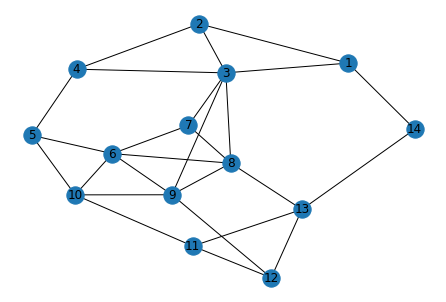

In [31]:
G.add_edges_from([*edges])
nx.draw(G,with_labels=True)

This is the normal dijkstra search to compute the shortest path between node `source` and `destination` if `contracted` flag is turned off.  

If not, we give the `contracted` variable the number of the node that we want to contract and the algorithm computes the shortest path between the nodes accordingly.  

Please note that we need to turn off the flag at the end of the function because the graph variable is passed by reference.

In [32]:
def dijkstra_with_contraction(G, source, destination, contracted = None):
    nx.set_node_attributes(G, {contracted: True}, 'contracted')
        
    shortest_path = dict()
    heap = list()
    
    for i in G.nodes():
        if not nx.get_node_attributes(G, 'contracted')[i]:
            shortest_path[i] = math.inf
            heap.append(i)
    shortest_path[source] = 0
    
    while len(heap) > 0:
        
        q = min(heap, key = lambda node : shortest_path[node])
        if q == destination:
            nx.set_node_attributes(G, {contracted: False}, 'contracted')
            return shortest_path[q]
        heap.remove(q)
        
        for v in G[q]:
            # if the node is contracted we skip it
            if not nx.get_node_attributes(G, 'contracted')[v]:
                distance = shortest_path[q] + G[q][v]['weight']
                if distance < shortest_path[v]:
                    shortest_path[v] = distance
                    
    nx.set_node_attributes(G, {contracted: False}, 'contracted')
    
    return math.inf # if we can't reach the destination

Computing the shortest path between every pair of nodes in the graph without any contraction. These values should be preserved through the contraction procedures.  

Of course we can use networkx here instead like [`nx.all_pairs_shortest_path`](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.shortest_paths.unweighted.all_pairs_shortest_path.html#networkx.algorithms.shortest_paths.unweighted.all_pairs_shortest_path).

In [33]:
shortest_paths = dict()
for i in G.nodes():
    # dictionary for every node
    shortest_paths[i] = dict()
    for j in G.nodes():
        # that will be filled with the shortest path
        # between it and other nodes
        shortest_paths[i][j] = dijkstra_with_contraction(G, i, j)

In [34]:
shortest_paths

{1: {1: 0,
  2: 1,
  3: 4,
  4: 3,
  5: 8,
  6: 6,
  7: 6,
  8: 5,
  9: 5,
  10: 8,
  11: 9,
  12: 6,
  13: 5,
  14: 3},
 2: {1: 1,
  2: 0,
  3: 4,
  4: 2,
  5: 7,
  6: 6,
  7: 6,
  8: 5,
  9: 5,
  10: 8,
  11: 9,
  12: 6,
  13: 6,
  14: 4},
 3: {1: 4,
  2: 4,
  3: 0,
  4: 2,
  5: 5,
  6: 2,
  7: 2,
  8: 1,
  9: 1,
  10: 4,
  11: 5,
  12: 2,
  13: 4,
  14: 6},
 4: {1: 3,
  2: 2,
  3: 2,
  4: 0,
  5: 5,
  6: 4,
  7: 4,
  8: 3,
  9: 3,
  10: 6,
  11: 7,
  12: 4,
  13: 6,
  14: 6},
 5: {1: 8,
  2: 7,
  3: 5,
  4: 5,
  5: 0,
  6: 3,
  7: 7,
  8: 6,
  9: 4,
  10: 6,
  11: 8,
  12: 5,
  13: 7,
  14: 9},
 6: {1: 6,
  2: 6,
  3: 2,
  4: 4,
  5: 3,
  6: 0,
  7: 4,
  8: 3,
  9: 1,
  10: 3,
  11: 5,
  12: 2,
  13: 4,
  14: 6},
 7: {1: 6,
  2: 6,
  3: 2,
  4: 4,
  5: 7,
  6: 4,
  7: 0,
  8: 3,
  9: 3,
  10: 6,
  11: 7,
  12: 4,
  13: 6,
  14: 8},
 8: {1: 5,
  2: 5,
  3: 1,
  4: 3,
  5: 6,
  6: 3,
  7: 3,
  8: 0,
  9: 2,
  10: 5,
  11: 6,
  12: 3,
  13: 5,
  14: 7},
 9: {1: 5,
  2: 5,
  3: 1,
  4: 

## How to choose the order of contraction

By calculating the edge difference of the nodes which equals to $S - E$; $S$ is number of the added arcs to the graph if that node is contracted and $E$ is the number of adjacent edges to the node that would be deleted if the node is contracted.

We want to contract the nodes in an ascending order of their edge difference values because if these nodes contracted first we will have to add a little number of arcs to the original graph in subsequent contractions.  

If the number of $S$ is lower than $E$, that means when contracted we won't add as many edges to the graph as we have deleted already, SO when we contract later nodes we will have more pruned graph and we would have to add less and less arcs in subsequent contractions.  

Think about it yourself, you will find that the nodes with the lowest ED are on "edge" of the graph not central nodes, which leads to small number of arcs to be added after contracting them and when we get to the contraction of central nodes we have already contracted most of the nodes of the graph so we don't need to add as many arcs as we would have added if these central nodes have been contracted before "edge" nodes.   

# Calculating ED

In [35]:
def calculate_edge_difference(G, shortest_paths):
    edge_difference = list()
    seenBefore = list()
    
    for i in G.nodes():
        # used in edge difference calculations
        edges_incident = len(G[i])

        # we will be deleting the node entry
        # from the original shortest paths
        # dictionary so we need to save its state
        # for later iterations
        contracted_node_paths = shortest_paths[i]
        del shortest_paths[i]
        
        # excluding the node that we have just contracted
        new_graph = [*G.nodes()] 
        new_graph.remove(i)
        
        # let's compute the new shortest paths between
        # the nodes of the graph without the contracted
        # node so we can see the changes and add arcs 
        # to the graph accordingly but that is in
        # the algorithm itself 
        new_shortest_paths = dict()

        for source in new_graph:
            new_shortest_paths[source] = dict()
            for destination in new_graph:
                # path the contracted node "i" to compute new shortest paths accordingly
                new_shortest_paths[source][destination] = dijkstra_with_contraction(G, \
                                                                                    source, \
                                                                                    destination, \
                                                                                    contracted = i)
        # the add arcs to keep the graph all pairs shortest paths invariant
        shortcuts = 0

        for source in new_shortest_paths:
            # we get a copy from the original and the new shortest paths dictionary
            SP_contracted = new_shortest_paths[source]
            SP_original = shortest_paths[source]
            for destination in SP_contracted:
                # this is statement so we don't add 2 arcs
                # for the same pair of nodes 
                if [source, destination] in seenBefore: continue
                seenBefore.append(sorted((source,destination)))
                
                # if there is a difference between the original SP and
                # post-contraction SP -- just add new arc
                if SP_contracted[destination] != SP_original[destination]:
                    shortcuts += 1
        
        # let's leave the dictionary as we took it 
        # from the last iteration
        shortest_paths[i] = contracted_node_paths
        
        # this is the value of the contraction
        # heuristic for that node
        ED = shortcuts - edges_incident
        edge_difference.append((i, ED))
    return edge_difference

In [36]:
edge_difference = calculate_edge_difference(G, shortest_paths)

In [37]:
# sort by the ED heuristic value
# so we can contract them in the same
# order as in this list
edge_difference.sort(key = lambda pair : pair[1])
edge_difference

[(8, -5),
 (10, -4),
 (5, -3),
 (7, -3),
 (11, -3),
 (14, 0),
 (2, 2),
 (1, 3),
 (6, 4),
 (13, 5),
 (4, 7),
 (12, 18),
 (3, 26),
 (9, 33)]

We have now computed the ED value for each node when it is the only node contracted in the graph, but in the algorithm itself we contract the nodes successively so these values we have generated won't be valid and reflecting the then current state of the graph possibly after the first iteration of the algorithm.

But as you remember from the introduction, that any arbitrary order of nodes contraction is valid and will lead to the correct answer eventually.

We could update the edge difference list at each iteration, which would be expensive for large graphs or select some nodes to update their ED value like the adjacent nodes of the current contracted node. After re-ordering the list of the node we continue our algorithm. There is a number of heuristics that update the order of contraction in the paper introducing the algorithm.

---

We will contract nodes according to the order of edge_difference list which would give us good enough preformance for the current problem.

In [38]:
# to keep track of the edges added after the algorithm finishes
edges_before = [*G.edges()]

In [39]:
current_graph = [*G.nodes()]

# iterating over the tuples (node, level)
# from the sorted edge difference list

for node_ED in edge_difference:
    node = node_ED[0]
    
    # now we will contract the given node through all iterations
    nx.set_node_attributes(G, {node: True}, 'contracted')
    
    # we have already contracted the node
    # so there is no need 
    new_graph = current_graph
    new_graph.remove(node)
    current_shortest_paths = dict()
    for source in new_graph:
            current_shortest_paths[source] = dict()
            for destination in new_graph:
                current_shortest_paths[source][destination] = dijkstra_with_contraction(G, \
                                                                                    source, \
                                                                                    destination)
                
    for source in current_shortest_paths:
        SP_contracted = current_shortest_paths[source]
        SP_original = shortest_paths[source]
        for destination in SP_contracted:
            if source == destination: continue
            if SP_contracted[destination] != SP_original[destination]:
                print("we have added edge between ", source, destination," after contracting", node)
                
                # it seems like we add two edges instead of one, but this is simple graph
                # so adding edge from a to b and then adding edge from b to a are the same
                # doesn't add a thing, we didn't include condition for that because it will
                # complicate the algorithm
                
                G.add_edge(source, destination, weight=SP_original[destination])
                
    
    current_graph = new_graph

we have added edge between  1 13  after contracting 14
we have added edge between  2 13  after contracting 14
we have added edge between  13 1  after contracting 14
we have added edge between  13 2  after contracting 14
we have added edge between  1 4  after contracting 2
we have added edge between  4 1  after contracting 2


new edges set after adding the additional arcs

In [40]:
edges_after = [*G.edges()]

In [41]:
print("# edges before", len(edges_before))
print("# edges after", len(edges_after))

# edges before 26
# edges after 29


Let's see what are these edges

In [42]:
added_edges = list(set(edges_after) - set(edges_before))
added_edges

[(1, 13), (2, 13), (1, 4)]

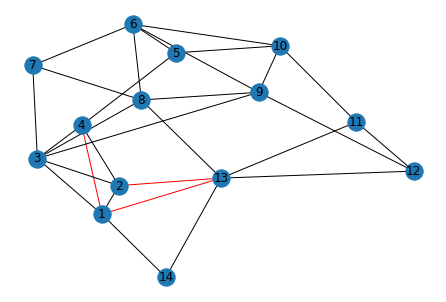

In [43]:
# let's color these edges and draw the graph again
colors = ['r' if edge in added_edges else 'k' for edge in G.edges()] 
nx.draw(G, with_labels=True, edge_color=colors)

After we have added the new edges we need to do dijkstra from source and dijkstra from destination, according to the **upward** and **downward** graph policy we talked about in the introduction.

In [44]:
# which is the same as edge_difference
# list because we didn't use any update heuristic
hierarchical_order = dict()
for order, node in enumerate(edge_difference):
    hierarchical_order[node[0]] = order

dictionary of nodes and its level of hierarchy

In [45]:
hierarchical_order

{8: 0,
 10: 1,
 5: 2,
 7: 3,
 11: 4,
 14: 5,
 2: 6,
 1: 7,
 6: 8,
 13: 9,
 4: 10,
 12: 11,
 3: 12,
 9: 13}

let's solve our problem with source node to be 8 and target node to be 12

In [46]:
source = 8
destination = 12

# Dijkstra From Source

**upward graph**

We will do the normal dijkstra algorithm with our origin to be $8$ but with one restriction, that we don't visit children of the relaxed node with lower level of hierarchy than their parent.  

So if we have relaxed node number $13$ we can't relax the edge between node $13$ and node $11$ because the level of node $13$ is higher.  

This is the pruning we talked about and it gave us the correct answer at the end.

In [47]:
# initializing 
SP_s = dict()
parent_s = dict()
unrelaxed_s = list()
for node in G.nodes():
    SP_s[node] = math.inf
    parent_s[node] = None
    unrelaxed_s.append(node)
SP_s[source] = 0

# dijkstra
while unrelaxed_s:
    node = min(unrelaxed_s, key = lambda node : SP_s[node])
    unrelaxed_s.remove(node)
    if SP_s[node] == math.inf: break
    for child in G[node]:
        # skip unqualified edges
        if hierarchical_order[child] < hierarchical_order[node]: continue
        distance = SP_s[node] + G[node][child]['weight']
        if distance < SP_s[child]:
            SP_s[child] = distance
            parent_s[child] = node

In [48]:
SP_s

{1: inf,
 2: inf,
 3: 1,
 4: inf,
 5: inf,
 6: 3,
 7: 6,
 8: 0,
 9: 2,
 10: inf,
 11: inf,
 12: 7,
 13: 5,
 14: inf}

# Dijkstra From Target

**downward graph**

Same idea as upward graph dijkstra but you don't relax an edge between a parent and child with higher hierarchy.

In [49]:
# initializing 
SP_t = dict()
parent_t = dict()
unrelaxed_t = list()
for node in G.nodes():
    SP_t[node] = math.inf
    parent_t[node] = None
    unrelaxed_t.append(node)
SP_t[destination] = 0

# dijkstra
while unrelaxed_t:
    node = min(unrelaxed_t, key = lambda node : SP_t[node])
    unrelaxed_t.remove(node)
    if SP_t[node] == math.inf: break
    for child in G[node]:
        # skip unqualified edges
        if hierarchical_order[child] < hierarchical_order[node]: continue
        distance = SP_t[node] + G[node][child]['weight']
        if distance < SP_t[child]:
            SP_t[child] = distance
            parent_t[child] = node

In [50]:
SP_t

{1: inf,
 2: inf,
 3: inf,
 4: inf,
 5: inf,
 6: inf,
 7: inf,
 8: inf,
 9: 1,
 10: inf,
 11: inf,
 12: 0,
 13: inf,
 14: inf}

We need to merge the common settled nodes from both `SP_d` and `SP_s` and see the minimum summation of value and that is our shortest path like in bi-directional search and collusion between front expansion and back expansion.

In [51]:
minimum = math.inf
merge_node = None
for i in SP_s:
    if SP_t[i] == math.inf: continue
    if SP_t[i] + SP_s[i] < minimum:
        minimum = SP_t[i] + SP_s[i]
        merge_node = i

In [52]:
minimum

3

In [53]:
merge_node

9

very small utility to see the route from origin of dijkstra to a given node

In [54]:
def route_dijkstra(parent, node):
    route = []
    while node != None:
        route.append(node)
        node = parent[node]
    return route[::-1]

In [55]:
route_from_target = route_dijkstra(parent_t, merge_node)
route_from_target

[12, 9]

In [56]:
route_from_source = route_dijkstra(parent_s, merge_node)
route_from_source

[8, 3, 9]

In [57]:
route = route_from_source + route_from_target[::-1][1:]
route

[8, 3, 9, 12]

let's use networkx algorithm to see if that is true or not

In [58]:
from networkx.algorithms.shortest_paths.weighted import single_source_dijkstra

In [59]:
single_source_dijkstra(G, source, destination)

(3, [8, 3, 9, 12])

# The Pruning

Let's check once again the shortest paths list the was generated from source dijkstra and destination dijkstra

In [60]:
# source dijkstra -- upward graph
SP_s

{1: inf,
 2: inf,
 3: 1,
 4: inf,
 5: inf,
 6: 3,
 7: 6,
 8: 0,
 9: 2,
 10: inf,
 11: inf,
 12: 7,
 13: 5,
 14: inf}

In [61]:
# target dijkstra -- downward graph
SP_t

{1: inf,
 2: inf,
 3: inf,
 4: inf,
 5: inf,
 6: inf,
 7: inf,
 8: inf,
 9: 1,
 10: inf,
 11: inf,
 12: 0,
 13: inf,
 14: inf}

The nodes that were ignored in the search because of its hierarchy level has shortest path of `inf`, these nodes were pruned from our search space.  

Let's count the nodes that were untouched from both dijkstra.

In [62]:
unvisited = 0
for s_node, s_dist in SP_s.items():
    for t_node, t_dist in SP_t.items():
        if s_node == t_node and s_dist == t_dist == math.inf:
            unvisited += 1
print(f"""we have skipped {unvisited} nodes from a graph with {len(G)}, 
so we have skipped {unvisited/len(G)*100}% of the nodes in our search space.""")

we have skipped 7 nodes from a graph with 14, 
so we have skipped 50.0% of the nodes in our search space.


# Notes for implementation

1. You don't need to use dijkstra for calculating SP, we only used it because we are working on a simple graph. If you are on a situation where you are dealing with a graph with negative cycles or self-loops or some other property where Dijkstra breaks down. You just need to use the appropriate algorithm for SP, but you need to enforce the policy of upward/downward graph in the algorithm itself.

2. Sometimes the path returned by merging both dijkstra would contain an edge that was added in the contraction phase, in that case you just replace that edge with the next shortest path from nodes incident to that edge.